# Prediction of back pain using Logistic Regression

The data comprises of 13 columns and 310 observations. 12 columns are numerical attributes of the spine/back. The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain. The intent is to predict the Status based on the 12 variables.

For additional info about the dataset, refer to https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

#### Let's first perform EDA and then proceed with model building

#### Step 1: Download all the libraries which we generally use while performing EDA

In [1]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm

#### Step 2: Import the data set on which EDA has to be performed

In [2]:
back_data = pd.read_csv("Predicting Back-pain.csv")

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Predicting Back-pain dataset.
    b. As the name suggests, the main intention of building a model on Predicting Back-pain dataset is to predi-ct whether a person has back-pain or not.
    c. This is a classification problem with two classes, one for Abnormal, which indicates presence of         back-pain, and another for normal, which indicates no back-pain.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
back_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


##### Since the unnamed column has names of other columns, we can delete it. Also, we have to rename other columns in the dataset as per the names in Kaggle.

In [4]:
# Deleting 'Unnamed: 13' column
del back_data['Unnamed: 13']

# Renaming other columns in the dataset as per Kaggle
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

#### Step 5: Get to know the structure of the data set using 'info()'method.

In [5]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


##### By having a look at the info above we can say that:
    a. Other than 'Status' column all other columns are numerical and continuous
    b. None of the columns have null values

#### Step 6: Get the 6-point summary using 'describe()' method.

In [6]:
print(back_data.describe())

       pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
count     310.000000                310.000000    310.000000   310.000000   
mean      117.920655                 26.296694      0.472979    21.321526   
std        13.317377                 37.559027      0.285787     8.639423  

##### By looking at the data above we can say that other than 'degree_spondylolisthesis' all other attributes have similar Mean and Median values. So, other than 'degree_spondylolisthesis' all the attributes are approximately normally distributed.

#### Step 7: Let's perform Univariate analysis

#### Since all the variables other than 'Status' are numerical, we can perform Univariate analysis on 'Status' and skip all other variables.

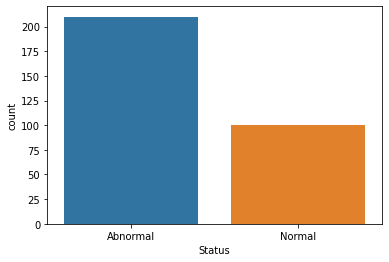

In [7]:
sns.countplot(x = 'Status', data = back_data)
plt.show()

In [8]:
back_data['Status'].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

##### By looking at the plot and values above, we can say that target variable doesn't have much of imbalance. The spread is somewhere around 2:1 for 'Abnormal' and 'Normal' classes respectively.

#### Step 8: Let's perform Bivariate analysis

#### Since we are trying to build Logistic Regression model, we have to have check whether there is Multi-collinearity among the Independent variables.

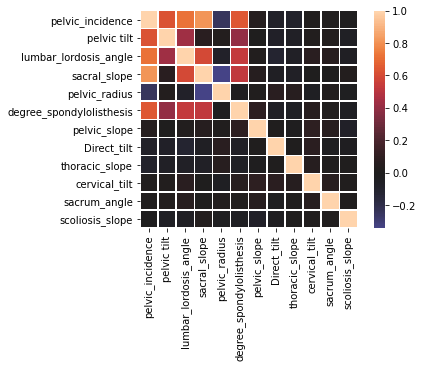

In [9]:
corr_back = back_data.corr()

# Let's generate the correlation plot 
sns.heatmap(corr_back, center=0, square=True, linewidths=.5)
plt.show()

In [10]:
# Let's check the correlation values
corr_back

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


##### By having a look at the plot and values above, we can say that there is High-level Multicollinearity among first six independent attributes.

#### Let's check whether any of the independent variables have discriminatory ability interms of target variable by taking mean & median as a measure and by plotting box plots

In [11]:
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [12]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


##### By looking at the Mean and Median values of Independent attributes for normal and abnormal classes, we can say that below variables are showing good discriminatory ability:
    a. pelvic_incidence
    b. pelvic tilt
    c. lumbar_lordosis_angle
    d. degree_spondylolisthesis

#### Let's plot Box plot to confirm the same

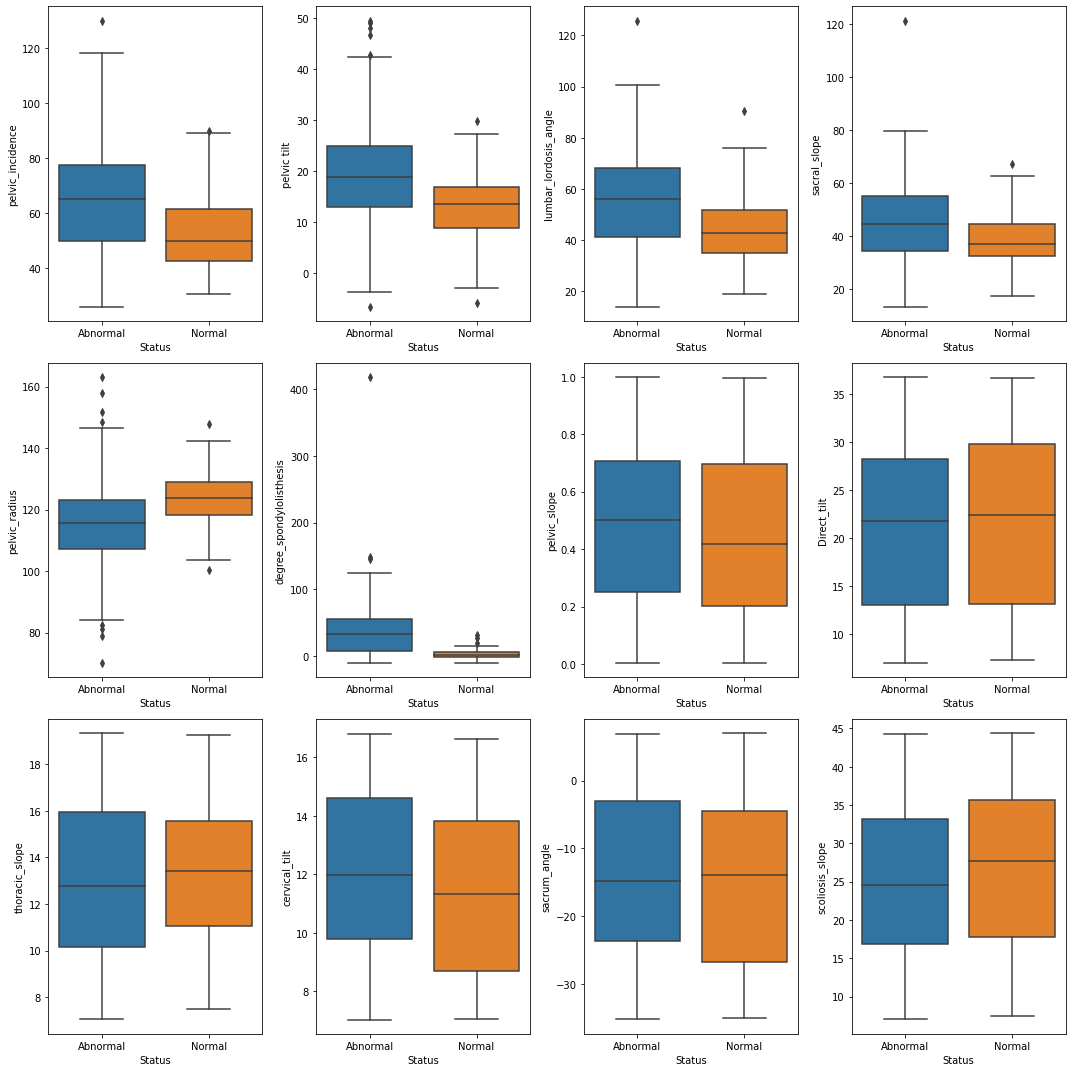

In [13]:
## Generating 3*4 matrix of box plots
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.boxplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

##### By looking at the Box plots above, we can say that first six attributes are showing discriminatory ability and last six attributes aren't showing any discriminatory ability with respect to target class.

#### To check whether there's any Linear Seperability, let's plot six scatter plots, each with two independent variables and target variable.

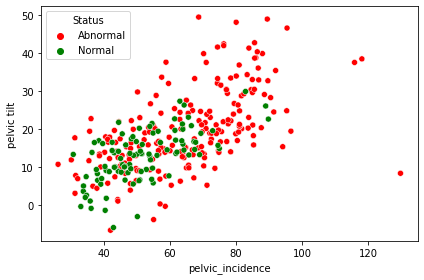

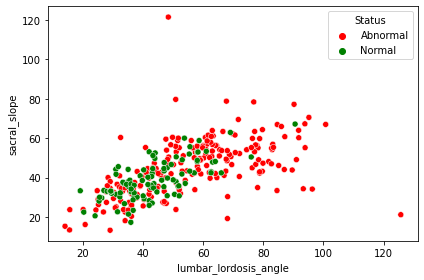

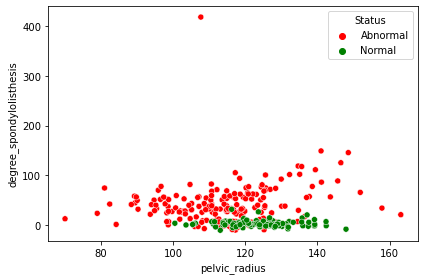

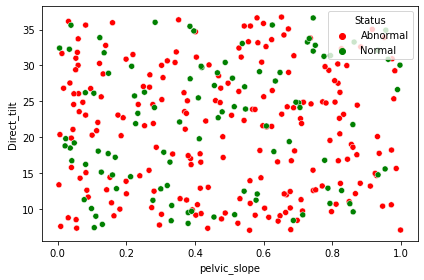

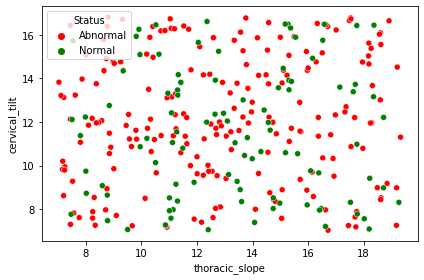

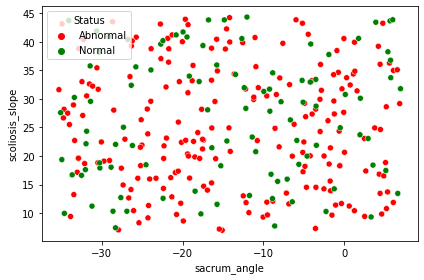

In [14]:
for i in range(0, int((len(back_data.columns)-1)/2)):
    ax = sns.scatterplot(x=back_data.iloc[:,(2*i)], y=back_data.iloc[:,(2*i)+1], hue = "Status", data = back_data, palette =['red','green'])
    plt.tight_layout()
    plt.show()

##### By looking at the scattered plots above, we can say that apart from 'degree_spondylolisthesis', none of the attributes are showing Linear Seperability towards target variable. In this case it is better to build a model based on a classification alogrithm other than Logistic Regression. But, let's build a model and see why Logistic Regression is not suitable for data which doesn't have Linear Seperability.

#### Let's start with model building

##### Before working on model building, let's convert 'Normal' and 'Abnormal' classes to meaningful values. Let's convert to 0 and 1 respectively.

In [15]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

#### Step 1: Let's divide Independent and target variables to X and Y respectively

In [16]:
X = back_data.loc[:, back_data.columns != "Status"]
y = back_data.loc[:, back_data.columns == "Status"]

#### Step 2: Let's split Train data and Test data

##### Along with splitting Train data and Test data, let's perform scaling and convert target variable to Integer data type. To perform all these operations at once, let's write a function. 

In [17]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    return(train_scaled, test_scaled, y_train, y_test)

In [18]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

#### Step 3: Let's build the basic model without performing any performance improvement steps such as Hyper-parameter tuning.

#### Let's build a model using Logistic Regression in Scikit-learn library

In [19]:
# Function to build a Logistic Regression model
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

logreg_result = logistic_regression(X_train_scaled, y_train)

#### Step 4: Let's validate the results

#### Based on the data we have, we can figure out that two metrics are important to evaluate the model:
    a. Recall(Class-1/Abnormal): This is the most important metric because if the patient is abnormal, he/she is going to get admitted to the hospital.
    b. precision(Class-0/Normal): This is second most important metric because if the patient is normal and if  he/she is getting admitted in hospital, hospital will loose the patient's confidnence.

#### Let's first validate the accuracy of Sicikit learn model

In [20]:
# Let's print accuracy scores for Train data and Test data
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))
# Here "{:.3f}" will print the result score upto three decimals

Training set score: 0.876
Test set score: 0.817


##### Based on the scores above, we can say that we have got a decent accuracy.

#### Let's check all the evaluation metrics of Scikit lern model. To look at the metrics directly, we have pass the actual and predicted values to the 'classification_report'. Let's predict the Train and Test data and then pass the predicted values to 'classification_report'.

In [21]:
y_pred_train = logreg_result.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train, target_names=['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.81      0.80      0.81        70
      Normal       0.91      0.91      0.91       147

    accuracy                           0.88       217
   macro avg       0.86      0.86      0.86       217
weighted avg       0.88      0.88      0.88       217



In [22]:
y_pred_test = logreg_result.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test, target_names=['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.68      0.83      0.75        30
      Normal       0.91      0.81      0.86        63

    accuracy                           0.82        93
   macro avg       0.79      0.82      0.80        93
weighted avg       0.83      0.82      0.82        93



##### By looking at the values above, we can say that we have built a decent model. Though only one attribute showed discriminatory ability towards target variable, we he got decent results.

#### Step 5: Let's build a model based on Stats library and check the results.

In [23]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.473055
         Iterations: 35
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.248     
Dependent Variable:  y                 AIC:               229.3058  
Date:                2021-11-12 20:49  BIC:               269.8646  
No. Observations:    217               Log-Likelihood:    -102.65   
Df Model:            11                LL-Null:           -136.45   
Df Residuals:        205               LLR p-value:       3.4943e-10
Converged:           0.0000            Scale:             1.0000    
No. Iterations:      35.0000                                        
--------------------------------------------------------------------
     Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------
x1   0.0814 8808197.2236  0.0000 1.0000 -17263749.2456 17263749.4084
x2   0.0765 5020625.4630  0.0000 1.0000  -9840245.0109  9840245.

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### Before looking into the results, we have got Convergence error. When we get Convergence error, Loss function will not be optimised completely. Hence, we cannot trust this model. Usually, Convergence error occurs when there is Multicollinearity issue in the data. As we have already seen, there's Multicollinearity among first six variables. Let's remove the attributes which have serious Multi-collinearity issues and try building a model. In this process, let's not remove 'degree_spondylolisthesis'. It is the only variable which has showed Linear Seperability with respect to Target variable.

#### Let's remove first four attributes: pelvic_incidence, pelvic tilt, lumbar_lordosis_angle, sacral_slope

In [24]:
X = back_data.iloc[:, 4:12]
y = back_data.iloc[:, 12:]

#### Let's Split Train data and Test data and then perform scaling using 'data_preprocess()'

In [25]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

#### Let's build a model using Logistic Regression in Scikit-learn library. As we have already defined 'logistic_regression()', we can use the same.

In [26]:
logreg_result = logistic_regression(X_train_scaled, y_train)

#### Let's validate the results

In [27]:
# Let's print accuracy scores for Train data and Test data
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.857
Test set score: 0.796


In [28]:
y_pred_train = logreg_result.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train, target_names=['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.76      0.81      0.79        70
      Normal       0.91      0.88      0.89       147

    accuracy                           0.86       217
   macro avg       0.83      0.85      0.84       217
weighted avg       0.86      0.86      0.86       217



In [29]:
y_pred_test = logreg_result.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test, target_names=['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.63      0.87      0.73        30
      Normal       0.92      0.76      0.83        63

    accuracy                           0.80        93
   macro avg       0.78      0.81      0.78        93
weighted avg       0.83      0.80      0.80        93



##### By looking at the results, we can say that there is not much of difference in the results. Though the accuracy has reduced a bit, Recall for Class-1 and Precision for Class-0 has improved a bit. This can be considered a slightly better model when compared to the first Scikit learn model we have built. Let's build Stats based model and see whether we get any better results.

In [30]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.492672
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.216     
Dependent Variable: y                AIC:              229.8196  
Date:               2021-11-12 20:49 BIC:              256.8588  
No. Observations:   217              Log-Likelihood:   -106.91   
Df Model:           7                LL-Null:          -136.45   
Df Residuals:       209              LLR p-value:      2.3044e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.9124      0.2040    -4.4732    0.0000    -1.3121    -0.5126
x2     1.6950      0.2635     6.4324    0.0000     1.1

##### By looking at the results, we can say that the model has converged completely. But, probability of Z-distribution for six attributes out of eight doesn't qualify for 90% confidence Interval test. So, it is better that we go ahead with the Scikit learn based model.

#### Though it has not met the expected conditions, let's evaluate the model using evaluation metrics.

#### Let's first predict the Train data and Test data. For Stats based model, we'll get probability. We have to convert the probability to output based on the Threshold value. By default, the threshold value would be 0.5. Let's write a function to predict values based on the default threshold value.

In [53]:
# Function to predict based on Threshold value
def predict(a, b):
    y = []
    for i in a:
        if i<b:
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

y_train_pred_stats = predict(result.predict(X_train_scaled), 0.5)
y_train_pred_stats

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [54]:
y_test_pred_stats = predict(result.predict(X_test_scaled), 0.5)
y_test_pred_stats

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0])

#### Let's evaluate using evaluation metrics calculated using 'classification_report()'. First for Train data and then for Test data.

In [43]:
print(classification_report(y_train, y_train_pred_stats, target_names=['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.59      0.99      0.74        70
      Normal       0.99      0.68      0.81       147

    accuracy                           0.78       217
   macro avg       0.79      0.83      0.77       217
weighted avg       0.86      0.78      0.79       217



In [39]:
print(classification_report(y_test, y_test_pred_stats, target_names=['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.51      0.90      0.65        30
      Normal       0.93      0.59      0.72        63

    accuracy                           0.69        93
   macro avg       0.72      0.74      0.68        93
weighted avg       0.79      0.69      0.70        93



##### Though we don't trust the model because of Confidence level issues, we have got the best results in terms of important parameters we have Identified, Recall for Class-1 and Precision for Class-0.

#### As an additional step, let's see how we plot AUC-ROC curve

#### Let's plot for Scikit learn model for both Train data and Test data

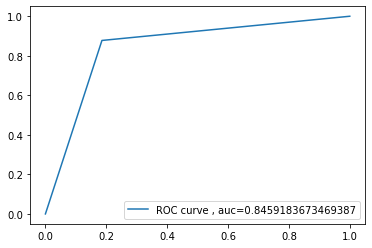

In [49]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_train,  y_pred_train)
auc = metrics.roc_auc_score(y_train,  y_pred_train)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

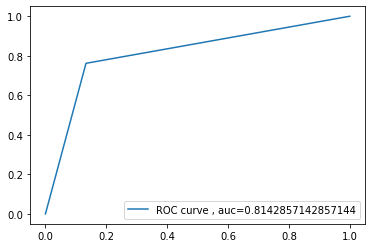

In [50]:
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_pred_test)
auc = metrics.roc_auc_score(y_test,  y_pred_test)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Let's plot for Stats model for both Train data and Test data

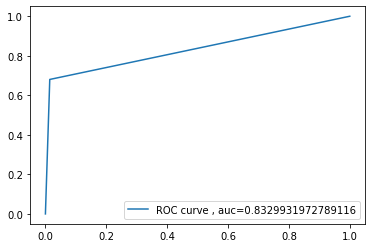

In [51]:
fpr, tpr, threshholds = metrics.roc_curve(y_train,  y_train_pred_stats)
auc = metrics.roc_auc_score(y_train,  y_train_pred_stats)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

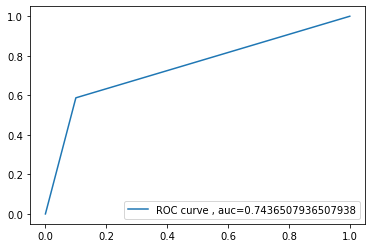

In [52]:
fpr, tpr, threshholds = metrics.roc_curve(y_test,  y_test_pred_stats)
auc = metrics.roc_auc_score(y_test,  y_test_pred_stats)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### By looking at the ROC-curve and auc values, we can definitely say that Scikit learn model is the best. This is as expected because we knew that there was Z-dist Confidence level issues for Stats model.

#### As an additional step, let's see how to plot Confusion matrix for the Train data and Test data of Stats model.

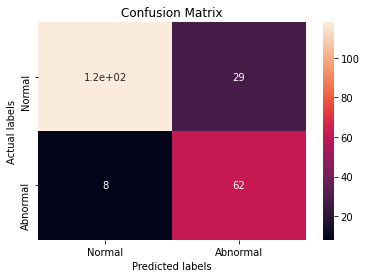

In [69]:
'''assigning the string Normal and Abnormal to the 0 and 1 values respectively. 
This is useful in plotting the confusion matrix'''
y_train_string = y_train.astype(str)
y_train_string[np.where(y_train_string == '0')] = 'Normal'
y_train_string[np.where(y_train_string == '1')] = 'Abnormal'

y_train_pred_stats_string = y_train_pred_stats.astype(str)
y_train_pred_stats_string[np.where(y_train_pred_stats_string == '0')] = 'Normal'
y_train_pred_stats_string[np.where(y_train_pred_stats_string == '1')] = 'Abnormal'

# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_train_string, y_train_pred_stats_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Abnormal']); ax.yaxis.set_ticklabels(['Normal', 'Abnormal']);
plt.show()

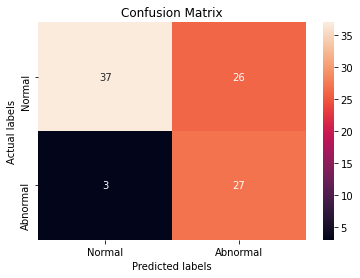

In [71]:
'''assigning the string Normal and Abnormal to the 0 and 1 values respectively. 
This is useful in plotting the confusion matrix'''
y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

y_test_pred_stats_string = y_test_pred_stats.astype(str)
y_test_pred_stats_string[np.where(y_test_pred_stats_string == '0')] = 'Normal'
y_test_pred_stats_string[np.where(y_test_pred_stats_string == '1')] = 'Abnormal'

ax= plt.subplot()
labels = ['Abnormal','Normal']
cm = confusion_matrix(y_test_string, y_test_pred_stats_string, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'Abnormal']); ax.yaxis.set_ticklabels(['Normal', 'Abnormal']);
plt.show()

#### At last, let's see how to fetch probability values for Predicted data in Scikit learn model. This can be used to apply different threshold values.

In [55]:
y_pred_train_proba = logreg_result.predict_proba(X_train_scaled)
y_pred_train_proba

array([[5.92034953e-02, 9.40796505e-01],
       [7.85115361e-01, 2.14884639e-01],
       [5.01600795e-01, 4.98399205e-01],
       [8.66326400e-04, 9.99133674e-01],
       [6.80576979e-01, 3.19423021e-01],
       [2.91139527e-02, 9.70886047e-01],
       [6.27235019e-01, 3.72764981e-01],
       [3.23380837e-01, 6.76619163e-01],
       [4.65466031e-01, 5.34533969e-01],
       [7.41875168e-01, 2.58124832e-01],
       [2.53575541e-01, 7.46424459e-01],
       [8.29350275e-02, 9.17064973e-01],
       [4.76427508e-04, 9.99523572e-01],
       [7.06021339e-03, 9.92939787e-01],
       [6.75587106e-03, 9.93244129e-01],
       [1.56709998e-01, 8.43290002e-01],
       [8.81915597e-01, 1.18084403e-01],
       [1.89923733e-02, 9.81007627e-01],
       [3.88538547e-01, 6.11461453e-01],
       [4.82746983e-01, 5.17253017e-01],
       [5.91618791e-01, 4.08381209e-01],
       [2.00077593e-01, 7.99922407e-01],
       [5.10715774e-01, 4.89284226e-01],
       [1.37220695e-02, 9.86277931e-01],
       [1.550269

#### Let's write a function to predict output values and use it with threshold 0.6

In [63]:
# Function to predict based on Threshold value
def predict(a, b):
    y = []
    for i in a.tolist():
        if i[1]<b:
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

y_train_pred_stats = predict(y_pred_train_proba, 0.6)
y_train_pred_stats

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])